## Background

A US-based housing company named Surprise Housing has decided to enter the Australian market.The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.
The company is looking at prospective properties to buy to enter the market.

#### Tasks

- Find variables are significant in predicting the price of a house
- Determine how these variables describe the price of a house.
- Determine the optimal value of lambda for ridge and lasso regression.

#### Business Goal


A model is required to predict the actual value of the prospective properties. And, how the variables affect the prices. This will be used to develop help management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.



<B>Input Given</B> : Data Set , Data Dictionary
    

# Approach 

- Understand the dataset
- Handle null values 
- Identify Variable Types ??
- Drop unnecessary variables 
- Data Visualization
    - Perform EDA to understand various variables.
    - Check the correlation between the variables.
- Data Preparation
    - Create dummy variables for all the categorical features.
    - Divide the data to train & Test.
    - Perform Scaling.
    - Divide data into dependent & Independent variables.
- Data Modelling & Evaluation
    - Create Linear Regression model, check assumptions
    - Create Linear Ridge and Lasso model
    - Evaluate by comparing the model metrics 
    - Report the final model.


### Understand the dataset

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
#import the necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler,MinMaxScaler
# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
housing = pd.read_csv("train.csv")

In [3]:
# check the shape

housing.shape

(1460, 81)

In [4]:
# Get summary of the dataset
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

<b>Target Variable</b> SalePrice. We have numerical and non-numercial variables which are impacting the SalePrice 

In [5]:
# Check first few rows to get the feel of the dataset
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


There are multiple rows with Null values. We will address them later 

In [6]:
# Lets check the random distribution 
housing.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Lets see the distribution of theindependent saleprice

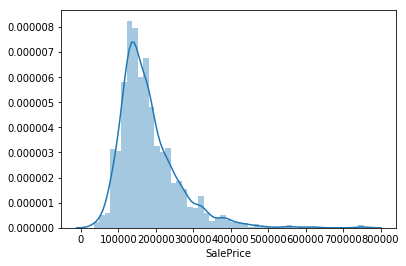

In [7]:
#Let's visualize the distribution of sale price
sns.distplot(housing['SalePrice'])

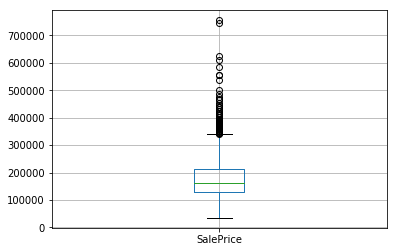

In [8]:
housing.boxplot(['SalePrice'])

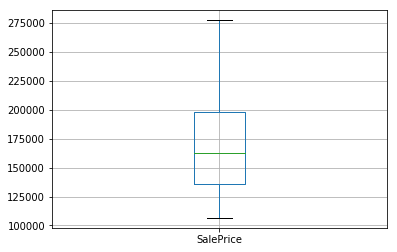

In [9]:
#Lets remve outliers and see how the boxpot looks now. 
#Keepiing the data within 10-90 percentile
housing=housing[(housing['SalePrice'] > np.percentile(housing['SalePrice'],10)) &( housing['SalePrice'] < np.percentile(housing['SalePrice'],90) )]
housing.boxplot(['SalePrice'])


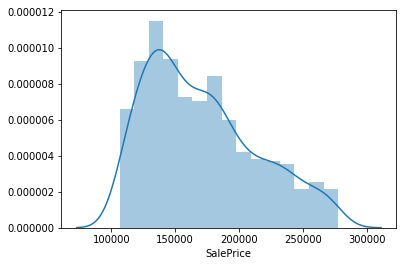

In [10]:
#Let's visualize the distribution of sale price after removing outliers 
sns.distplot(housing['SalePrice'])

In [11]:
# Check for missing values percentage in different columns
def checkMissingPercentage(df):
    null = []
    for i in df.isnull().sum()*100/df.shape[0]:
        null.append(i)
    data = {'columns': list(df), '% null': null}
    df_null = pd.DataFrame(data)
    df_null= df_null[df_null['% null'] != 0]
    df_null=df_null.sort_values(by='% null', ascending=False, inplace=False)
    display(df_null)
    return df_null


### Handle null values 

In [12]:
housingNonNullCols = checkMissingPercentage(housing)


,columns,% null
72,PoolQC,99.485861
74,MiscFeature,96.143959
6,Alley,93.658955
73,Fence,79.005998
57,FireplaceQu,47.643530
3,LotFrontage,20.137104
58,GarageType,2.999143
59,GarageYrBlt,2.999143
60,GarageFinish,2.999143
63,GarageQual,2.999143


In [13]:
#Get the list of the columns having 75% or more missing values 
list(housingNonNullCols[housingNonNullCols["% null"] > 75]["columns"])

['PoolQC', 'MiscFeature', 'Alley', 'Fence']

In [14]:
#Lets remove the fields which have very high percentage of missing data found above
housingNonNull = housing.drop(list(housingNonNullCols[housingNonNullCols["% null"] > 75]["columns"]), axis = 1)
print('Shape of the orginal dataset :', housing.shape)
print('Shape after dropping:', housingNonNull.shape)

Shape of the orginal dataset : (1167, 81)
Shape after dropping: (1167, 77)


In [15]:
# Lets check the missing value percentage again
housingNonNullCols=checkMissingPercentage(housingNonNull)

,columns,% null
56,FireplaceQu,47.643530
3,LotFrontage,20.137104
57,GarageType,2.999143
58,GarageYrBlt,2.999143
59,GarageFinish,2.999143
62,GarageQual,2.999143
63,GarageCond,2.999143
31,BsmtExposure,1.542416
29,BsmtQual,1.456727
30,BsmtCond,1.456727


Lets handle the missing columns data one by one. 

####  FireplaceQu: Fireplace quality
- Ex	Excellent - Exceptional Masonry Fireplace
- Gd	Good - Masonry Fireplace in main level
- TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
- Fa	Fair - Prefabricated Fireplace in basement
- Po	Poor - Ben Franklin Stove
- NA	No Fireplace

In [16]:
# FireplaceQu values are missing probably because there was no Fireplace. 
# Lets replace the missing value by "No Fireplace" at the columsn Filling the NANs in 'FireplaceQu' with the most frequent value 'No Fireplace'
# Filling the NANs in 'FireplaceQu' with the most frequent value 'No Fireplace'  as NA 

housingNonNull['FireplaceQu'].fillna('NA', inplace=True)

In [17]:
# Lets valudate the values FireplaceQu
housingNonNull['FireplaceQu'].value_counts()

NA    556
Gd    283
TA    271
Fa     33
Po     17
Ex      7
Name: FireplaceQu, dtype: int64

#### LotFrontage: Linear feet of street connected to property


In [18]:
#Lets see the impact of this columns to target column 
housing["LotFrontage"].corr(housing["SalePrice"])

0.23291921569456028

Its significant correlation for SalePrice and cannot be ignored .

In [19]:
#Let's replace the missing vaues with the median as its numerical value 
housingNonNull['LotFrontage'].fillna(housingNonNull['LotFrontage'].median(), inplace=True)

#### Let's check all the Garage related fields now

In [20]:
GarageFields = ["GarageType","GarageYrBlt","GarageFinish","GarageQual","GarageCond"]
#Lets see the values here 
for item in GarageFields:
    print(item)
    print(housing[item].value_counts())

GarageType
Attchd     735
Detchd     313
BuiltIn     58
Basment     16
CarPort      5
2Types       5
Name: GarageType, dtype: int64
GarageYrBlt
2005.0    54
2004.0    43
2003.0    40
2006.0    40
1977.0    34
2007.0    34
1976.0    27
1968.0    26
1999.0    26
1998.0    26
2000.0    25
2002.0    24
1950.0    21
1966.0    21
1978.0    19
1960.0    19
1997.0    18
1957.0    18
1958.0    18
1962.0    18
1993.0    18
2001.0    17
1964.0    17
1974.0    16
1954.0    16
1996.0    16
1963.0    16
1959.0    15
1965.0    15
1970.0    15
          ..
1926.0     4
1916.0     4
1922.0     4
1931.0     3
1982.0     3
1923.0     3
1928.0     3
1924.0     3
1946.0     3
1952.0     2
1932.0     2
1937.0     2
1942.0     2
1947.0     2
1914.0     2
1935.0     2
1915.0     2
1910.0     2
1921.0     2
1918.0     2
1929.0     2
1900.0     1
1906.0     1
1945.0     1
1908.0     1
1934.0     1
2010.0     1
1938.0     1
1933.0     1
1927.0     1
Name: GarageYrBlt, Length: 97, dtype: int64
GarageFinish
Unf   

In [21]:
# From above we have "GarageType","GarageFinish","GarageQual","GarageCond" as categorical values 
# where we dont have any identifier for No Garage 
# GarageType is year built, values must be missign if there is no Garage 
# Lets add missing values = No Garage ie 'NA' for catgorial fields at "GarageType","GarageFinish","GarageQual","GarageCond" 
# And, 0 for the the missing year 
for item in GarageFields:
    if item != 'GarageYrBlt':
        housingNonNull[item].fillna('NA', inplace=True)
    else :
        housingNonNull[item].fillna(0, inplace=True)

#### Let's check all the Basement related fields now

In [22]:
# Similarly We have columns related to basement 
BaseMentFields = ["BsmtExposure","BsmtFinType2","BsmtQual","BsmtCond","BsmtFinType1"]
#Lets see the values here 
for item in BaseMentFields:
    print(item)
    print(housing[item].value_counts())

BsmtExposure
No    801
Av    176
Mn     88
Gd     84
Name: BsmtExposure, dtype: int64
BsmtFinType2
Unf    1002
Rec      49
LwQ      43
BLQ      30
ALQ      14
GLQ      12
Name: BsmtFinType2, dtype: int64
BsmtQual
Gd    547
TA    543
Ex     40
Fa     20
Name: BsmtQual, dtype: int64
BsmtCond
TA    1068
Gd      54
Fa      28
Name: BsmtCond, dtype: int64
BsmtFinType1
Unf    334
GLQ    308
ALQ    204
BLQ    127
Rec    115
LwQ     62
Name: BsmtFinType1, dtype: int64


In [23]:
#As per datadictionary "NA" is where basement is not available 
#We dont have this value in the dataset 

#Lets replace the missing values are "NA" 
#Not all Basement columns are catelogical variables 

for item in BaseMentFields:
    housingNonNull[item].fillna('NA', inplace=True)
   

In [24]:
# Only 3 Fields are remaining and see the values there 

Remaining = ["MasVnrArea","MasVnrType","Electrical"]
for item in Remaining:
    print(item)
    print(housing[item].value_counts())

MasVnrArea
0.0       703
180.0       8
72.0        8
120.0       7
16.0        7
108.0       7
106.0       6
170.0       5
320.0       5
80.0        5
360.0       5
288.0       4
183.0       4
168.0       4
178.0       4
132.0       4
84.0        4
252.0       4
210.0       4
196.0       4
40.0        4
76.0        4
99.0        3
220.0       3
82.0        3
246.0       3
166.0       3
240.0       3
130.0       3
44.0        3
         ... 
96.0        1
448.0       1
244.0       1
564.0       1
653.0       1
150.0       1
468.0       1
238.0       1
163.0       1
137.0       1
142.0       1
138.0       1
215.0       1
247.0       1
600.0       1
423.0       1
278.0       1
262.0       1
443.0       1
299.0       1
167.0       1
162.0       1
573.0       1
1047.0      1
295.0       1
387.0       1
762.0       1
479.0       1
481.0       1
175.0       1
Name: MasVnrArea, Length: 257, dtype: int64
MasVnrType
None       707
BrkFace    363
Stone       77
BrkCmn      13
Name: MasVnrType, dt

In [25]:
#Lets see the impact of this columns to target column 
housing["MasVnrArea"].corr(housing["SalePrice"])


0.2400854171785288

In [26]:
#Significant variable . Lets replace missing values with 0 considering Masonry Vineer is not available 
housingNonNull['MasVnrArea'].fillna(0, inplace=True)

In [27]:
#MasVnrType is categorical valiable for missing values by None considering Masonry Vineer is not available  
housingNonNull['MasVnrType'].fillna('None', inplace=True)

In [28]:
#Electrical
#Difficult to say Electicity is not available in the missing home as its the basic necesscities . Let's with most frequent value SBrkr
#i.e. Standard Circuit Breakers & Romex
housingNonNull['Electrical'].fillna('SBrkr', inplace=True)

In [29]:
#check the missing vaues again 
housingNonNullCols = checkMissingPercentage(housingNonNull)

,columns,% null


All nulls are handled now . Lets move to the next steps

### Data Visualization and Dropping unnecessary variables 

In [30]:
# Id is not any adding value to the analysis, lets drop it 
housingNonNull.drop("Id", axis=1, inplace=True)

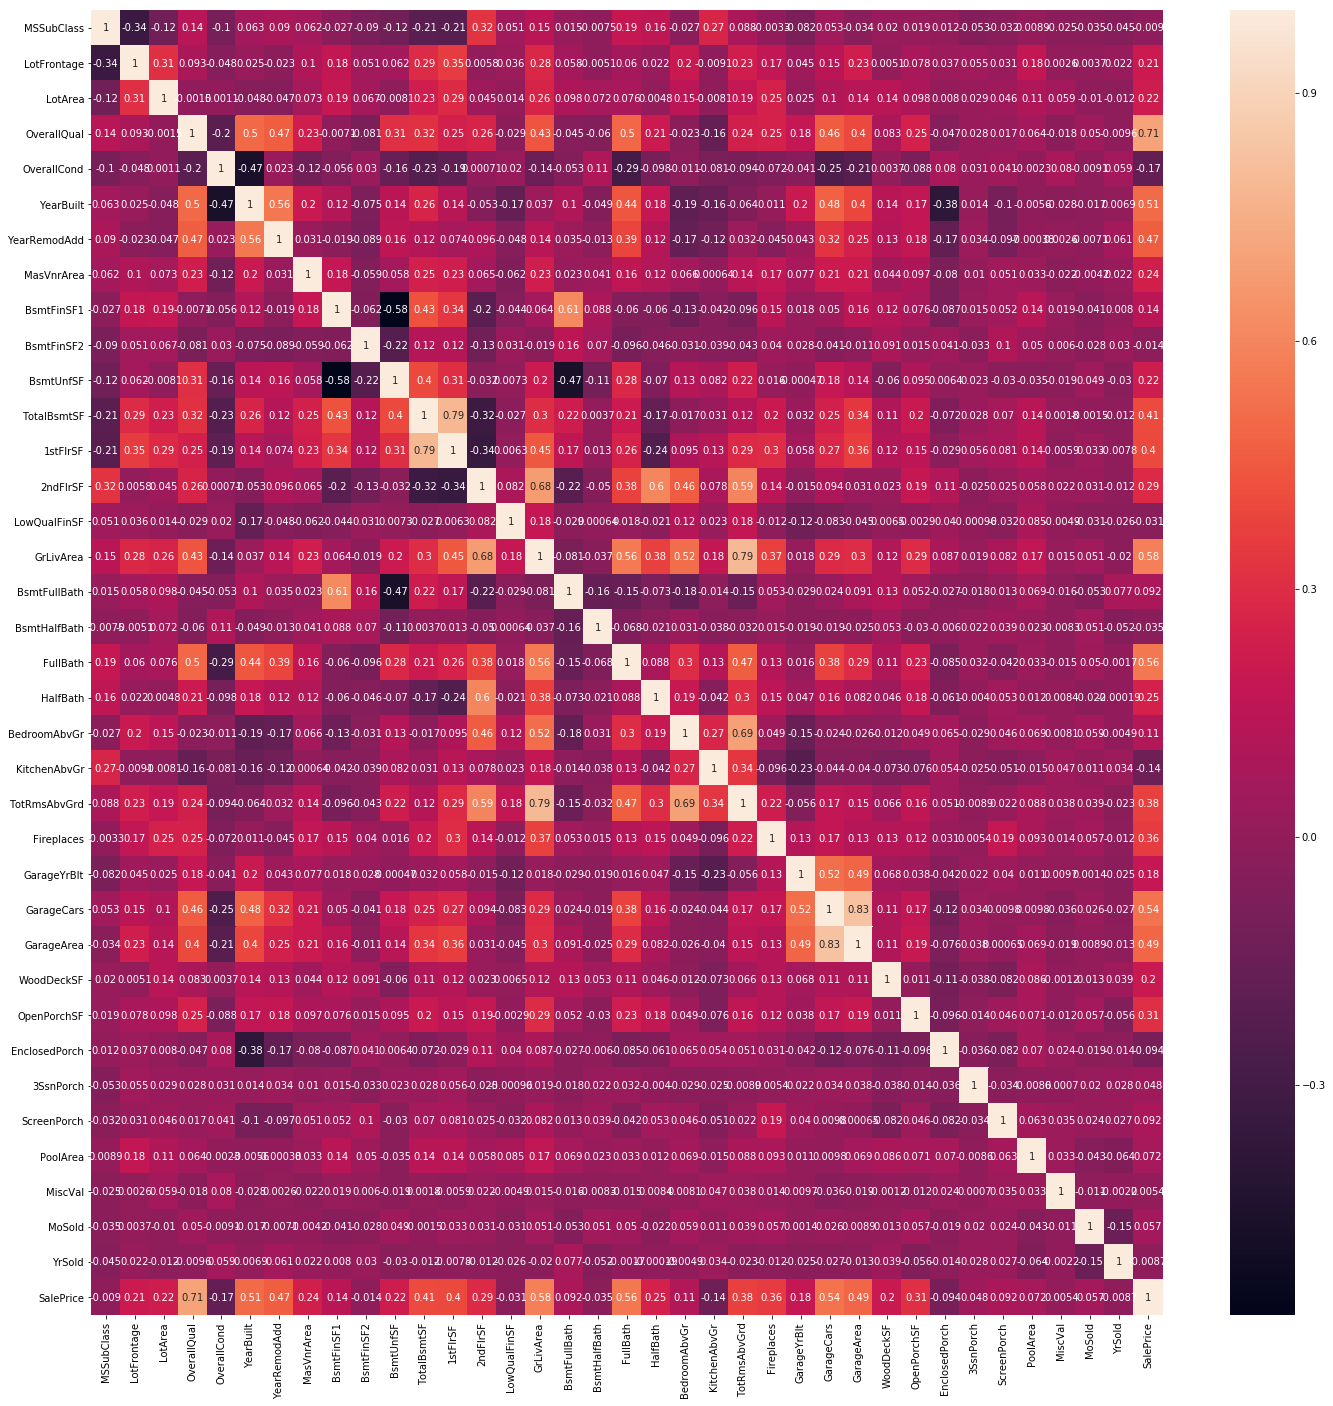

In [31]:
plt.figure(figsize=(24, 24))
sns.heatmap(housingNonNull.corr(), annot = True)

Find correlated variables and drop highly correlated one 

In [32]:
cor = housingNonNull.corr()
# Create correlation matrix
corr_matrix = housingNonNull.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find features with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
to_drop

['GarageArea']

In [33]:
# Drop features 
housingNonNull.drop(to_drop, axis=1, inplace=True)
housingNonNull.shape

(1167, 75)

Lets Create derived variables 

In [34]:
#Getting the age of the houses
import datetime
housingNonNull['CurrentYear'] = datetime.datetime.now().year
housingNonNull["Age"] = housingNonNull['CurrentYear'] - housingNonNull['YearBuilt']


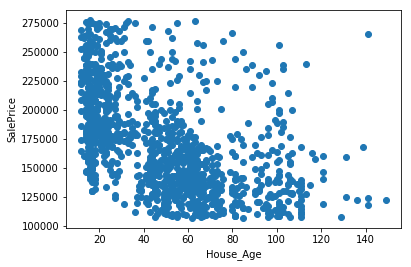

In [35]:
plt.scatter(x=housingNonNull['Age'], y=housingNonNull['SalePrice'])
plt.xlabel("House_Age"); plt.ylabel("SalePrice");

In [36]:
housingNonNull["Age"].corr(housingNonNull["SalePrice"])

-0.5097994657694349

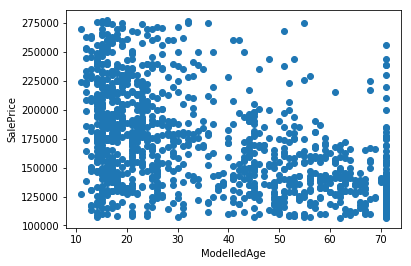

In [37]:
# Getting the trend of the Remoddeled age
housingNonNull["ModelledAge"] = housingNonNull['CurrentYear'] - housingNonNull['YearRemodAdd']
plt.scatter(x=housingNonNull['ModelledAge'], y=housingNonNull['SalePrice'])
plt.xlabel("ModelledAge"); plt.ylabel("SalePrice");

In [38]:
housingNonNull["ModelledAge"].corr(housingNonNull["SalePrice"])

-0.468492567262226

In [39]:
housingNonNull.drop(['CurrentYear', 'YearBuilt','YearRemodAdd'], axis = 1, inplace = True)

Surely there is significant relation between the age of the house and Sale Price

### Data Preparation 

We are planning to the Ridge and Lasso, these can be conviniently be used for Feature selection as the coefficient derived will help us derive the top predictor variables 

Let's now prepare the data and build the model.

To identify independent variables X, We need to identify the categorical and non-categorical variables and create dummies for the raining data 

Lets use the object type of the columns to identify the numerical and non-numerical columns and see if they can traslated into Non-Categorical and Categorical


In [40]:
housing_numerical = housingNonNull.select_dtypes(include=['int64','float64']) # These would be out non-categorical variables
housing_numerical.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'Age', 'ModelledAge'],
      dtype='object')

In [41]:
housing_Categorical = housingNonNull.select_dtypes(include=['object'])
housing_Categorical.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [42]:
for i in range(0,len(housing_numerical.columns)):
    print(housing_numerical.columns[i],":", housing_numerical[housing_numerical.columns[i]].value_counts())
    

MSSubClass : 20     447
60     235
50     113
120     78
80      57
70      53
160     49
90      44
30      26
190     23
85      20
75      10
45       6
180      3
40       3
Name: MSSubClass, dtype: int64
LotFrontage : 70.0     299
60.0     106
80.0      64
75.0      48
50.0      42
65.0      40
85.0      24
78.0      21
64.0      18
24.0      18
73.0      17
68.0      16
90.0      15
72.0      15
63.0      14
79.0      13
74.0      13
100.0     13
59.0      12
43.0      12
57.0      12
66.0      12
71.0      11
51.0      11
55.0      11
76.0      10
53.0      10
69.0      10
40.0       9
35.0       9
        ... 
49.0       2
124.0      2
112.0      1
97.0       1
33.0       1
182.0      1
174.0      1
101.0      1
134.0      1
109.0      1
138.0      1
149.0      1
129.0      1
141.0      1
107.0      1
56.0       1
38.0       1
106.0      1
118.0      1
39.0       1
144.0      1
45.0       1
140.0      1
128.0      1
104.0      1
114.0      1
168.0      1
152.0      1
46.0      

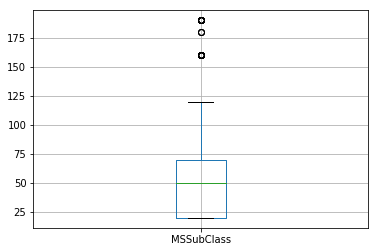

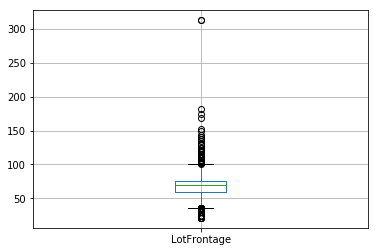

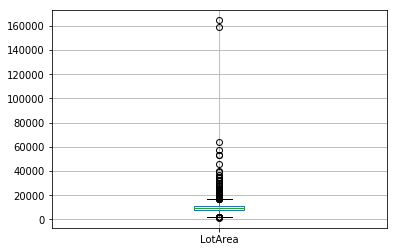

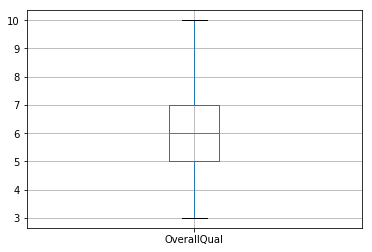

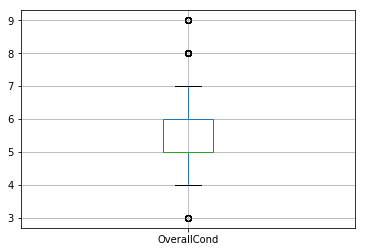

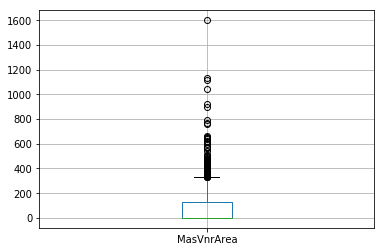

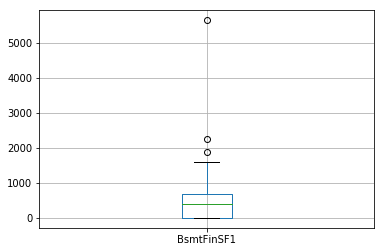

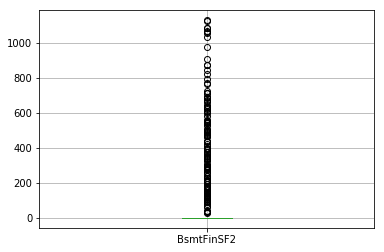

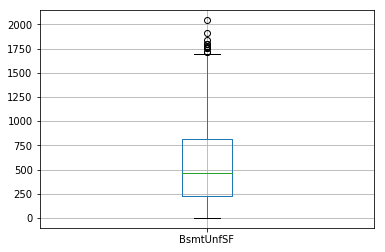

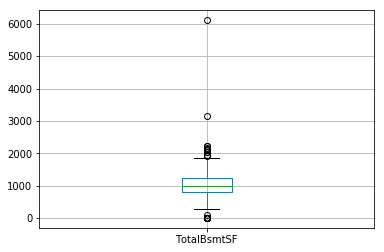

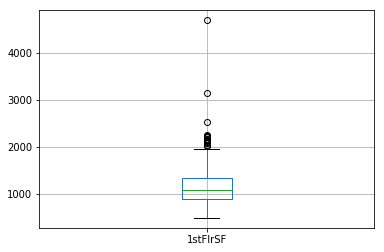

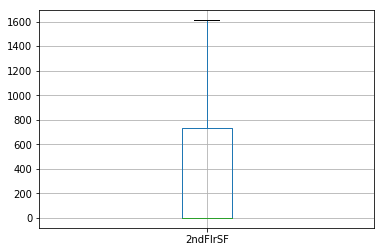

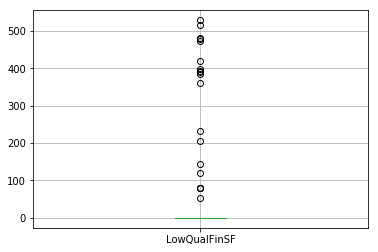

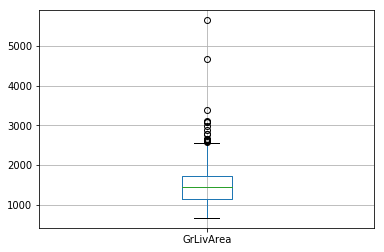

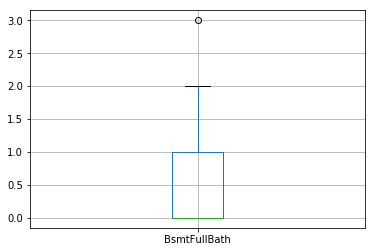

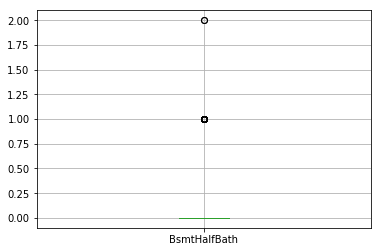

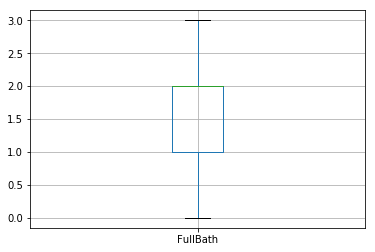

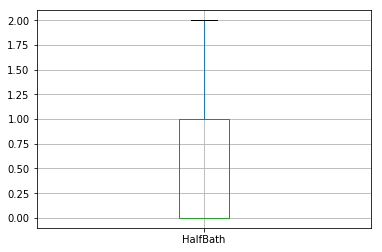

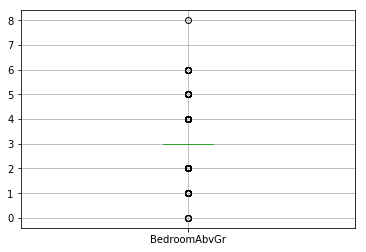

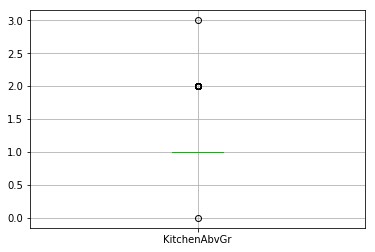

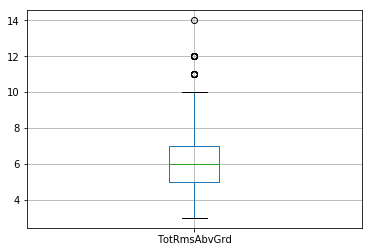

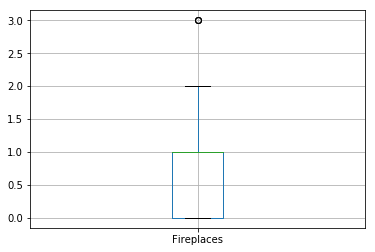

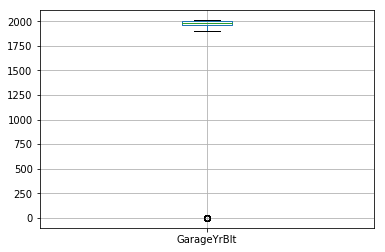

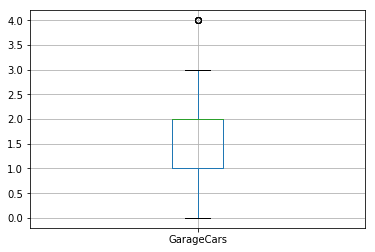

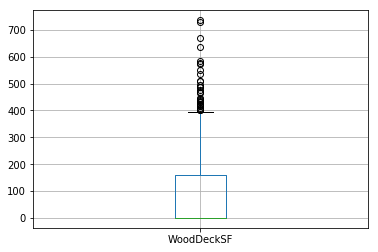

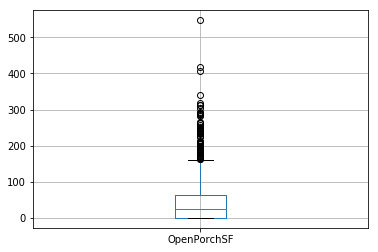

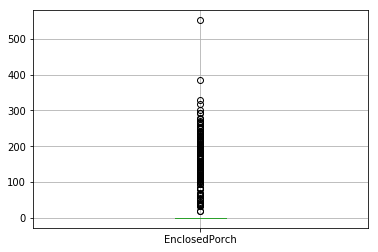

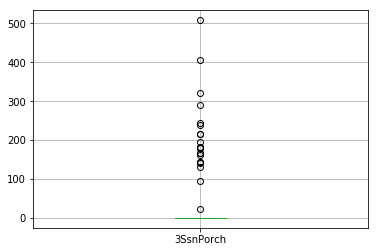

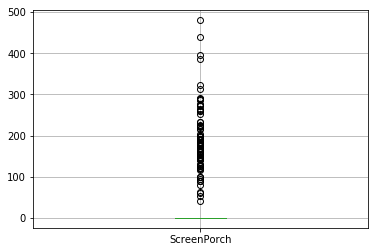

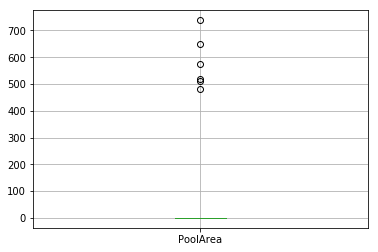

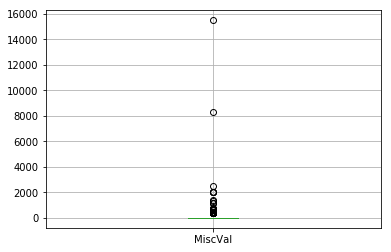

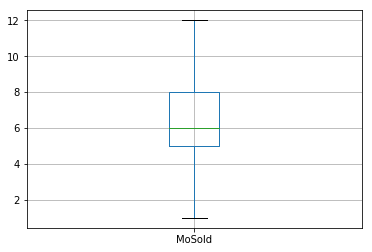

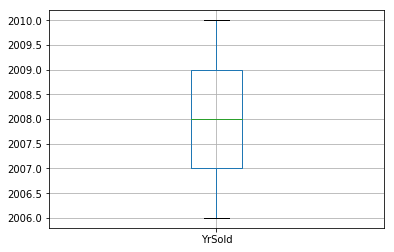

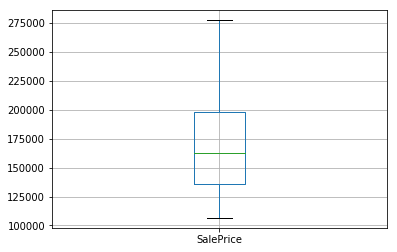

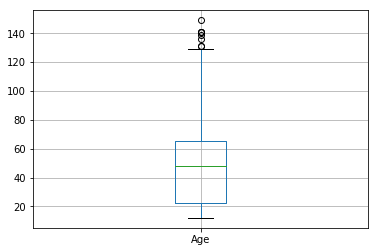

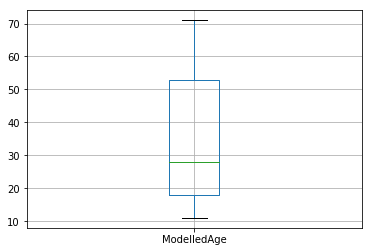

In [43]:
for column in housing_numerical:
    plt.figure()
    housing_numerical.boxplot([column])

We have many outliers which needs to be handled 

In [44]:
#Defining method for outliers  treatment
def dropOutliers(data_frame, numerical_columns):
    list = []
    for col in numerical_columns:
        Q1 = data_frame[col].quantile(.5)
        Q3 = data_frame[col].quantile(.95)
        IQR = Q3-Q1
        data_frame =  data_frame[(data_frame[col] >= (Q1-(1.5*IQR))) & (data_frame[col] <= (Q3+(1.5*IQR)))] 
    return data_frame

In [45]:
print("Before:", len(housingNonNull))
housingNonNulltemp=dropOutliers(housingNonNull, housing_numerical.columns)
print("After:", len(housingNonNulltemp))

Before: 1167
After: 336


Lets not drop the other outliers, it will be huge data loss

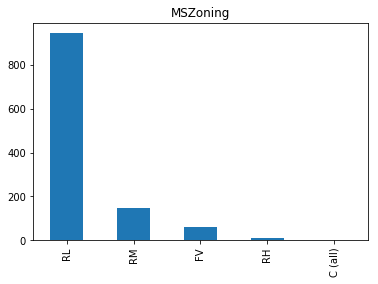

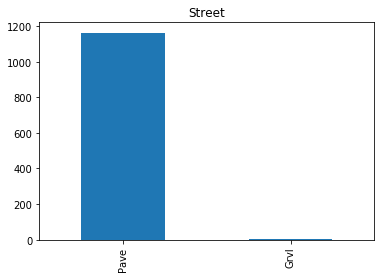

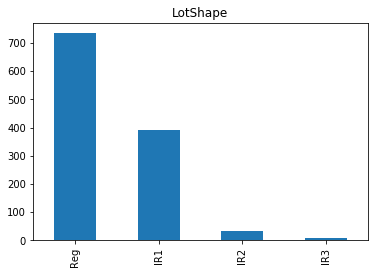

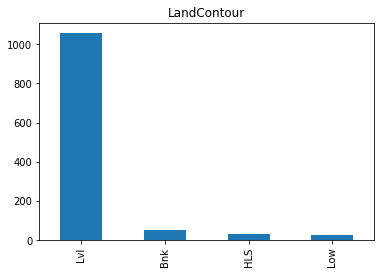

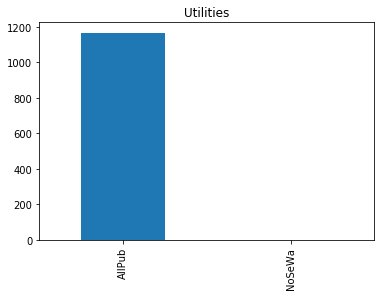

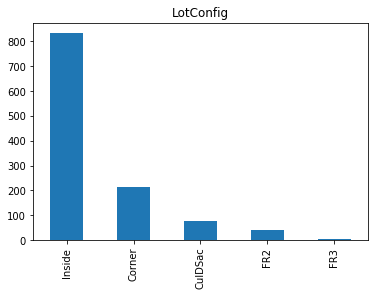

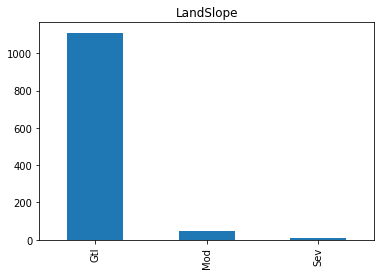

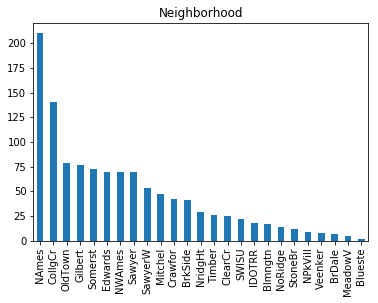

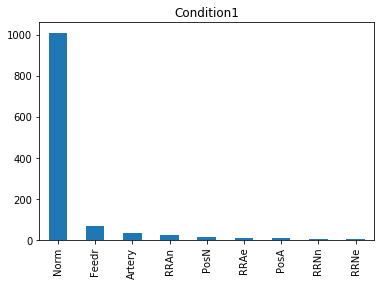

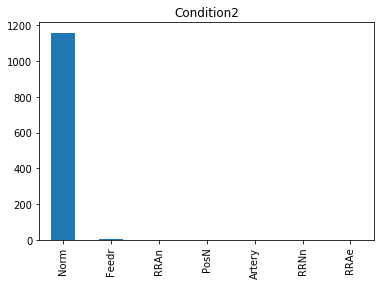

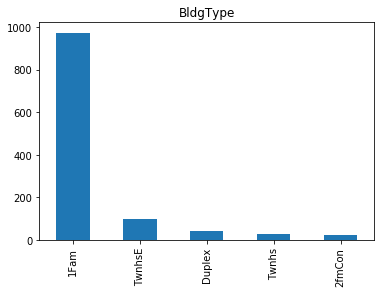

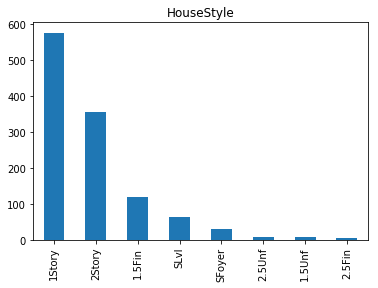

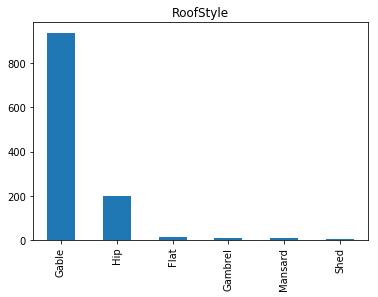

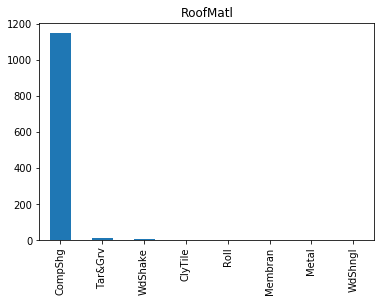

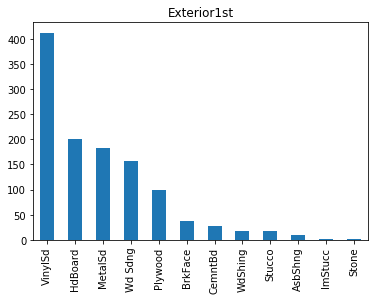

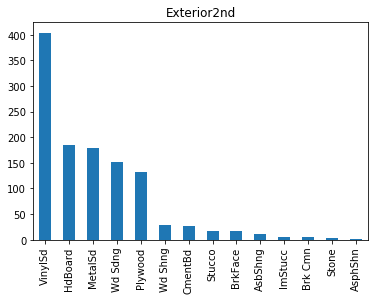

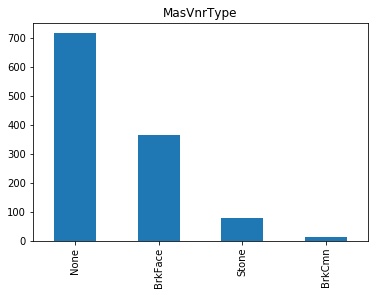

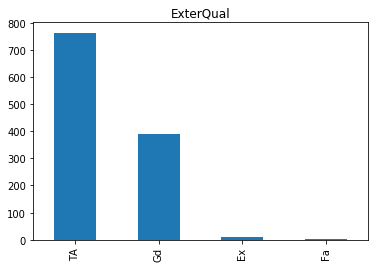

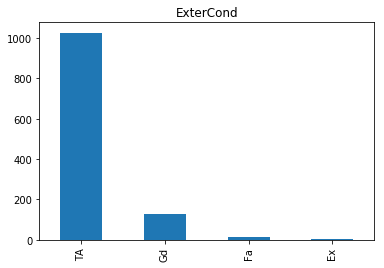

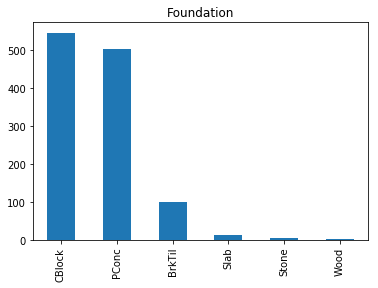

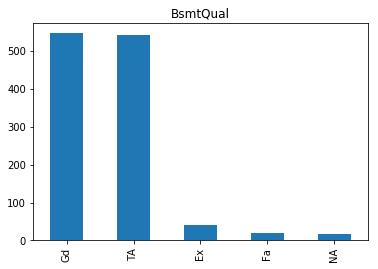

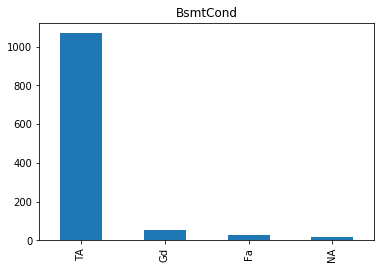

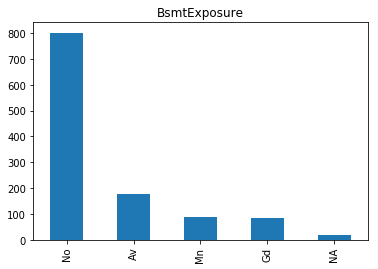

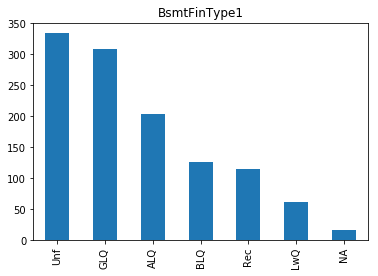

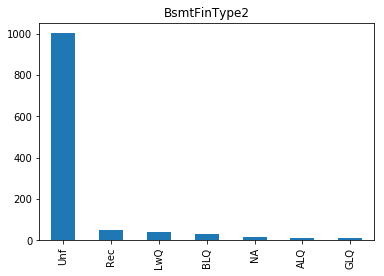

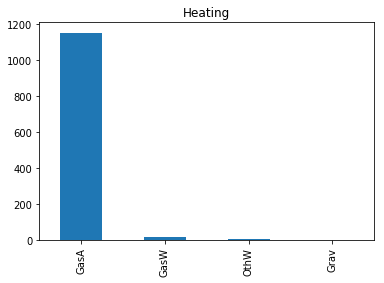

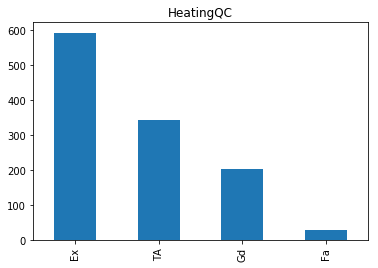

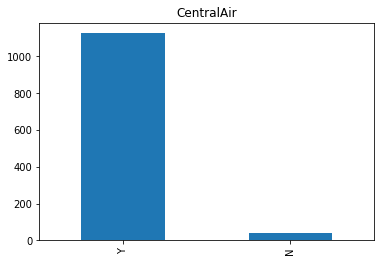

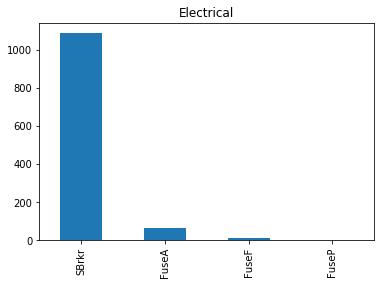

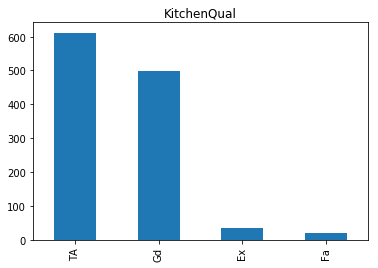

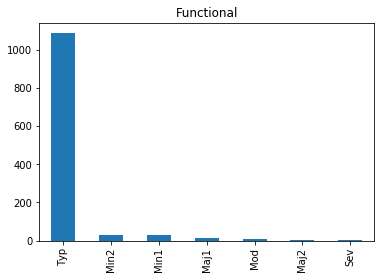

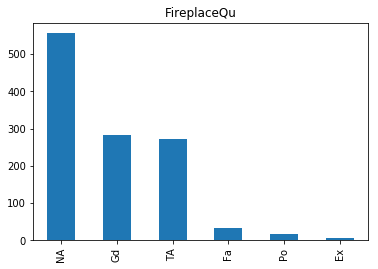

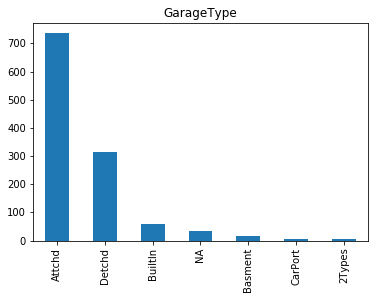

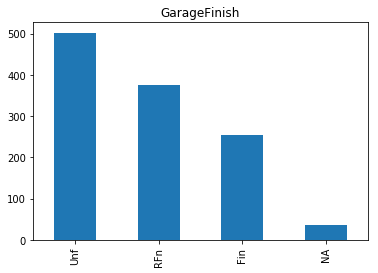

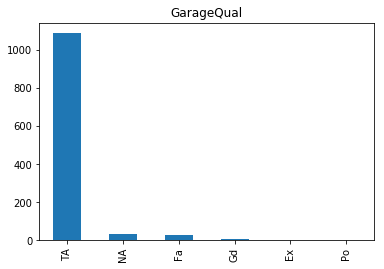

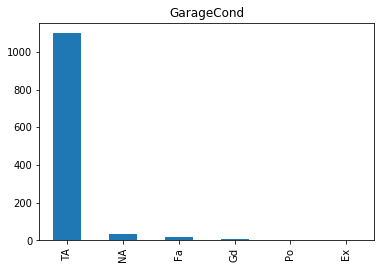

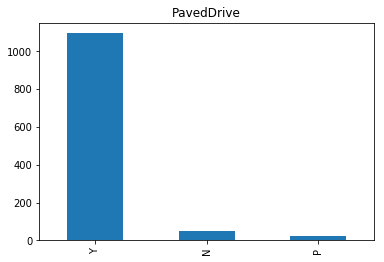

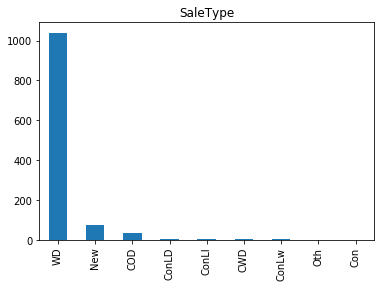

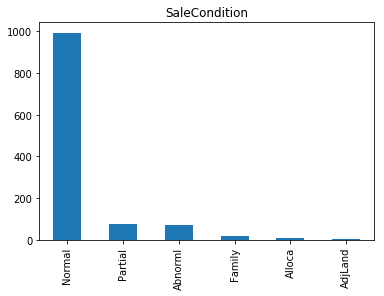

In [46]:
for column in housing_Categorical:
    plt.figure()
    plt.title(column)
    housing_Categorical[column].value_counts().plot(kind='bar')

Following fields can be ommitted for analysis one category value covers more than 90% or the dataset 
- Street 
- Utilities 
- Condition2
- RoofMatl

In [47]:
print("Before:" ,housing_Categorical.shape)
housing_Categorical.drop(['Street','Utilities','Condition2','RoofMatl'],axis=1,inplace=True)
print("After:" ,housing_Categorical.shape)

Before: (1167, 39)
After: (1167, 35)


In [48]:
#Lets have a look and see the columns again
housing_Categorical.columns

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [49]:
housing_Categorical.head()


,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,...,Gd,Typ,NA,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,Gable,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,Gable,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,Gable,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


Few columns do display some sort of order .


In [50]:
ordinal_columns = ['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']
housingNonNull[ordinal_columns].head()


,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,Gtl,Gd,Gd,TA,No,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,Reg
1,Gtl,TA,Gd,TA,Gd,ALQ,Unf,Ex,Y,TA,RFn,TA,TA,TA,Reg
2,Gtl,Gd,Gd,TA,Mn,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1
3,Gtl,TA,TA,Gd,No,ALQ,Unf,Gd,Y,Gd,Unf,TA,TA,TA,IR1
4,Gtl,Gd,Gd,TA,Av,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1


In [51]:
# Let's convert categorical variable to numeric. 
#we convert categorical variables into factors i.e number because to make things easy.
housing_Categorical[ordinal_columns[0]] = housing_Categorical[ordinal_columns[0]].map({'Gtl':0,'Mod':1,'Sev':2})
housing_Categorical[ordinal_columns[1]] = housing_Categorical[ordinal_columns[1]].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_Categorical[ordinal_columns[2]] = housing_Categorical[ordinal_columns[2]].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_Categorical[ordinal_columns[3]] = housing_Categorical[ordinal_columns[3]].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_Categorical[ordinal_columns[4]] = housing_Categorical[ordinal_columns[4]].map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
housing_Categorical[ordinal_columns[5]] = housing_Categorical[ordinal_columns[5]].map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_Categorical[ordinal_columns[6]] = housing_Categorical[ordinal_columns[6]].map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_Categorical[ordinal_columns[7]] = housing_Categorical[ordinal_columns[7]].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_Categorical[ordinal_columns[8]] = housing_Categorical[ordinal_columns[8]].map({'N':0,'Y':1})
housing_Categorical[ordinal_columns[9]] = housing_Categorical[ordinal_columns[9]].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_Categorical[ordinal_columns[10]] = housing_Categorical[ordinal_columns[10]].map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
housing_Categorical[ordinal_columns[11]] = housing_Categorical[ordinal_columns[11]].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_Categorical[ordinal_columns[12]] = housing_Categorical[ordinal_columns[12]].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_Categorical[ordinal_columns[13]] = housing_Categorical[ordinal_columns[13]].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_Categorical[ordinal_columns[14]] = housing_Categorical[ordinal_columns[14]].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [52]:
# convert into dummies - one hot encoding
dummies = pd.get_dummies(housing_Categorical, drop_first=True)
dummies.head()

,LotShape,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,3,0,3,2,4,3,1,6,1,4,...,0,0,0,0,1,0,0,0,1,0
1,3,0,2,2,4,3,4,5,1,4,...,0,0,0,0,1,0,0,0,1,0
2,0,0,3,2,4,3,2,6,1,4,...,0,0,0,0,1,0,0,0,1,0
3,0,0,2,2,3,4,1,5,1,3,...,0,0,0,0,1,0,0,0,0,0
4,0,0,3,2,4,3,3,6,1,4,...,0,0,0,0,1,0,0,0,1,0


In [53]:
# Create X with the numerical variables 
X = housingNonNull.loc[:, list(housing_numerical.columns)] 
X.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age,ModelledAge
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0,0,0,0,0,2,2008,208500,18,18
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,0,0,0,0,5,2007,181500,45,45
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,0,0,0,0,0,9,2008,223500,20,19
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,272,0,0,0,0,2,2006,140000,106,51
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,0,0,0,0,0,12,2008,250000,21,21


In [54]:
# Merge the dummy variables with X
X = pd.concat([X, dummies], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,0,0,0,0,1,0,0,0,1,0


In [55]:
from sklearn.model_selection import train_test_split
housing_train,housing_test = train_test_split(X,train_size=0.7,test_size=0.3,random_state=50)

In [56]:
#numerical_columns = housingNonNull.select_dtypes(include=np.number).columns.tolist()
scaler = StandardScaler()
housing_train[housing_numerical.columns] = scaler.fit_transform(housing_train[housing_numerical.columns])
housing_test[housing_numerical.columns] = scaler.transform(housing_test[housing_numerical.columns])

## Model Building and Evaluation

### Linear Regression

Note : We cannot use RFE with GridSearchCV as we have  243 variable with 5 folds will create coo many fits and it will take more then couple of hours to get the result so i am using RFE directly

In [57]:
y_train = housing_train.pop('SalePrice')
X_train = housing_train
y_test = housing_test.pop('SalePrice')

X_test= housing_test

Let's predict car prices, a dataset using linear regression.

In [58]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [59]:
# Running RFE with the output number of the variable equal to 70
from sklearn.feature_selection import RFE
rfe = RFE(lm,70)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=70, step=1, verbose=0)

In [60]:
#Check the scores of the predictors 
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [61]:
#Check RFE selected variables
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)
rfe_sel_columns

['OverallQual',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageCars',
 'Age',
 'ModelledAge',
 'LandSlope',
 'BsmtCond',
 'KitchenQual',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'LandContour_Low',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_MeadowV',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Condition1_Norm',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'HouseStyle_1.5Unf',
 'HouseStyle_SLvl',
 'RoofStyle_Gambrel',
 'RoofStyle_Mansard',
 'Exterior1st_BrkFace',
 'Exterior1st_HdBoard',
 'Exterior1st_ImStucc',
 'Exterior1st_Stucco',
 'Exterior2nd_BrkFace',
 'Exterior2nd_Stucco',
 'Exterior2nd_Wd Shng',
 'MasVnrType_BrkFace',
 'MasVnrType_None',
 'MasVnrType_Stone',
 'Found

In [62]:
# Writing function to calculate VIF for the variables to check multicolinearity
# Import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
def fetch_vif_df(local_df):
    vif_df = pd.DataFrame()
    vif_df['Features'] = local_df.columns
    vif_df['VIF'] = [variance_inflation_factor(local_df.values, i) for i in range(local_df.shape[1])]
    vif_df['VIF'] = round(vif_df['VIF'], 2)
    vif_df = vif_df.sort_values(by='VIF', ascending=False)
    vif_df = vif_df.reset_index(drop=True)
    return vif_df

In [63]:
#We can filter the dataser as per the Features selected above 
print("Before: X_train:",X_train.shape," X_test:", X_test.shape)
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]
print("After: X_train:",X_train.shape," X_test:", X_test.shape)

Before: X_train: (816, 179)  X_test: (351, 179)
After: X_train: (816, 70)  X_test: (351, 70)


In [65]:
#X_train_rfe.info
fetch_vif_df(X_train)

,Features,VIF
0,BsmtFinSF1,inf
1,BsmtFinSF2,inf
2,BsmtUnfSF,inf
3,TotalBsmtSF,inf
4,1stFlrSF,inf
5,2ndFlrSF,inf
6,LowQualFinSF,inf
7,GrLivArea,inf
8,GarageYrBlt,614.28
9,GarageType_NA,609.18


In [66]:
X_train=X_train.drop('BsmtFinSF2',axis=1)
X_test=X_test.drop('BsmtFinSF2',axis=1)
#X_train_rfe.info
fetch_vif_df(X_train)

,Features,VIF
0,1stFlrSF,inf
1,2ndFlrSF,inf
2,LowQualFinSF,inf
3,GrLivArea,inf
4,GarageYrBlt,614.28
5,GarageType_NA,609.18
6,BsmtCond,80.08
7,MSZoning_RL,66.80
8,MasVnrType_None,58.53
9,FireplaceQu_NA,53.78


In [69]:
X_train=X_train.drop('2ndFlrSF',axis=1)
X_test=X_test.drop('2ndFlrSF',axis=1)
#X_train_rfe.info
fetch_vif_df(X_train)

,Features,VIF
0,GarageYrBlt,614.28
1,GarageType_NA,609.18
2,BsmtCond,80.08
3,MSZoning_RL,66.80
4,MasVnrType_None,58.53
5,FireplaceQu_NA,53.78
6,KitchenQual,39.55
7,MasVnrType_BrkFace,29.83
8,FireplaceQu_Gd,28.17
9,FireplaceQu_TA,26.12


In [70]:
X_train=X_train.drop('GarageType_NA',axis=1)
X_test=X_test.drop('GarageType_NA',axis=1)
#X_train_rfe.info
fetch_vif_df(X_train)

,Features,VIF
0,BsmtCond,79.69
1,MSZoning_RL,66.59
2,MasVnrType_None,57.25
3,FireplaceQu_NA,53.51
4,KitchenQual,39.34
5,MasVnrType_BrkFace,29.24
6,FireplaceQu_Gd,28.16
7,FireplaceQu_TA,26.09
8,Functional_Typ,25.30
9,SaleCondition_Normal,15.16


In [71]:
X_train=X_train.drop('TotalBsmtSF',axis=1)
X_test=X_test.drop('TotalBsmtSF',axis=1)
#X_train_rfe.info
fetch_vif_df(X_train)

,Features,VIF
0,BsmtCond,76.31
1,MSZoning_RL,66.58
2,MasVnrType_None,57.18
3,FireplaceQu_NA,53.31
4,KitchenQual,39.30
5,MasVnrType_BrkFace,29.16
6,FireplaceQu_Gd,28.01
7,FireplaceQu_TA,25.93
8,Functional_Typ,25.21
9,SaleCondition_Normal,15.16


In [72]:
X_train=X_train.drop('BsmtCond',axis=1)
X_test=X_test.drop('BsmtCond',axis=1)
#X_train_rfe.info
fetch_vif_df(X_train)

,Features,VIF
0,MSZoning_RL,61.86
1,MasVnrType_None,55.39
2,FireplaceQu_NA,48.93
3,KitchenQual,38.89
4,MasVnrType_BrkFace,28.46
5,FireplaceQu_Gd,25.80
6,Functional_Typ,25.01
7,FireplaceQu_TA,23.85
8,SaleCondition_Normal,15.14
9,MSZoning_RM,11.29


In [73]:
X_train=X_train.drop('MSZoning_RL',axis=1)
X_test=X_test.drop('MSZoning_RL',axis=1)
#X_train_rfe.info
fetch_vif_df(X_train)

,Features,VIF
0,MasVnrType_None,51.16
1,FireplaceQu_NA,41.98
2,KitchenQual,36.86
3,MasVnrType_BrkFace,26.06
4,Functional_Typ,24.76
5,FireplaceQu_Gd,22.36
6,FireplaceQu_TA,20.38
7,SaleCondition_Normal,14.99
8,Condition1_Norm,7.97
9,MasVnrType_Stone,7.15


In [74]:
X_train=X_train.drop('MasVnrType_None',axis=1)
X_test=X_test.drop('MasVnrType_None',axis=1)
#X_train_rfe.info
fetch_vif_df(X_train)

,Features,VIF
0,KitchenQual,34.37
1,FireplaceQu_NA,28.62
2,Functional_Typ,23.18
3,FireplaceQu_Gd,15.78
4,SaleCondition_Normal,14.78
5,FireplaceQu_TA,14.12
6,Condition1_Norm,7.85
7,BsmtFinSF1,4.13
8,BsmtUnfSF,3.95
9,Exterior1st_Stucco,3.80


In [75]:
X_train=X_train.drop('KitchenQual',axis=1)
X_test=X_test.drop('KitchenQual',axis=1)
#X_train_rfe.info
fetch_vif_df(X_train)

,Features,VIF
0,Functional_Typ,21.99
1,FireplaceQu_NA,20.92
2,SaleCondition_Normal,14.72
3,FireplaceQu_Gd,11.65
4,FireplaceQu_TA,10.63
5,Condition1_Norm,7.69
6,BsmtFinSF1,4.13
7,BsmtUnfSF,3.94
8,Exterior1st_Stucco,3.79
9,Exterior2nd_Stucco,3.77


In [76]:
X_train=X_train.drop('Functional_Typ',axis=1)
X_test=X_test.drop('Functional_Typ',axis=1)
#X_train_rfe.info
fetch_vif_df(X_train)

,Features,VIF
0,SaleCondition_Normal,14.70
1,FireplaceQu_NA,12.46
2,Condition1_Norm,7.67
3,FireplaceQu_Gd,7.15
4,FireplaceQu_TA,6.79
5,BsmtFinSF1,4.02
6,BsmtUnfSF,3.88
7,Exterior1st_Stucco,3.79
8,Exterior2nd_Stucco,3.77
9,Age,3.58


In [77]:
X_train=X_train.drop('SaleCondition_Partial',axis=1)
X_test=X_test.drop('SaleCondition_Partial',axis=1)
#X_train_rfe.info
fetch_vif_df(X_train)

,Features,VIF
0,FireplaceQu_NA,8.56
1,SaleCondition_Normal,8.39
2,Condition1_Norm,7.66
3,FireplaceQu_TA,5.15
4,FireplaceQu_Gd,4.96
5,BsmtFinSF1,4.00
6,BsmtUnfSF,3.84
7,Exterior1st_Stucco,3.78
8,Exterior2nd_Stucco,3.77
9,Age,3.56


In [78]:
X_train=X_train.drop('FireplaceQu_NA',axis=1)
X_test=X_test.drop('FireplaceQu_NA',axis=1)
#X_train_rfe.info
fetch_vif_df(X_train)

,Features,VIF
0,SaleCondition_Normal,5.28
1,Condition1_Norm,5.11
2,BsmtFinSF1,3.99
3,BsmtUnfSF,3.84
4,Exterior1st_Stucco,3.78
5,Exterior2nd_Stucco,3.75
6,Age,3.56
7,1stFlrSF,3.39
8,OverallQual,2.67
9,GrLivArea,2.32


In [79]:
X_train=X_train.drop('SaleCondition_Normal',axis=1)
X_test=X_test.drop('SaleCondition_Normal',axis=1)
#X_train_rfe.info
fetch_vif_df(X_train)

,Features,VIF
0,BsmtFinSF1,3.99
1,BsmtUnfSF,3.82
2,Exterior1st_Stucco,3.77
3,Exterior2nd_Stucco,3.75
4,Age,3.51
5,1stFlrSF,3.38
6,Condition1_Norm,3.36
7,OverallQual,2.65
8,GrLivArea,2.32
9,GarageCars,2.15


In [80]:
from sklearn.metrics import r2_score, mean_squared_error

### Ridge and Lasso Regression

Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

In [81]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_ridge.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [82]:
# Printing the best hyperparameter alpha
model_cv_ridge.best_params_

{'alpha': 2.0}

We will use this aplha to build the model to see the model performance

In [83]:
cv_results_ridge = pd.DataFrame(model_cv_ridge.cv_results_)
cv_results_ridge = cv_results_ridge[cv_results_ridge['param_alpha']<=200]
cv_results_ridge.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004612,0.001360,0.001373,0.000510,0.0001,{'alpha': 0.0001},-0.363045,-0.342573,-0.376453,-0.339482,...,-0.356577,0.013759,23,-0.324718,-0.329912,-0.307281,-0.300139,-0.327590,-0.317928,0.011940
1,0.005390,0.000488,0.002403,0.000790,0.001,{'alpha': 0.001},-0.363042,-0.342568,-0.376441,-0.339460,...,-0.356566,0.013761,22,-0.324719,-0.329912,-0.307282,-0.300139,-0.327586,-0.317927,0.011940
2,0.006184,0.001466,0.001712,0.000581,0.01,{'alpha': 0.01},-0.363009,-0.342521,-0.376326,-0.339244,...,-0.356462,0.013781,21,-0.324727,-0.329907,-0.307290,-0.300131,-0.327548,-0.317921,0.011935
3,0.004983,0.002092,0.001599,0.000484,0.05,{'alpha': 0.05},-0.362878,-0.342326,-0.375824,-0.338324,...,-0.356021,0.013864,19,-0.324761,-0.329895,-0.307331,-0.300100,-0.327396,-0.317897,0.011913
4,0.004588,0.001198,0.001199,0.000399,0.1,{'alpha': 0.1},-0.362757,-0.342086,-0.375215,-0.337263,...,-0.355523,0.013968,18,-0.324800,-0.329885,-0.307389,-0.300064,-0.327219,-0.317872,0.011888


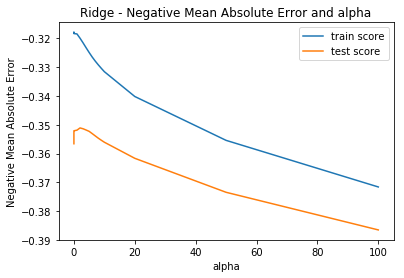

In [84]:
# plotting mean test and train scoes with alpha 
cv_results_ridge['param_alpha'] = cv_results_ridge['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results_ridge['param_alpha'], cv_results_ridge['mean_train_score'])
plt.plot(cv_results_ridge['param_alpha'], cv_results_ridge['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Ridge - Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [85]:
def deriveMetricsForAlphaRidge(alpha,X_test,y_train,y_pred_train,y_test,X_train):
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    metric = []
    r2_train_lr = r2_score(y_train, y_pred_train)
    metric.append(r2_train_lr)

    r2_test_lr = r2_score(y_test, y_pred_test)
    metric.append(r2_test_lr)

    rss1_lr = np.sum(np.square(y_train - y_pred_train))
    metric.append(rss1_lr)

    rss2_lr = np.sum(np.square(y_test - y_pred_test))
    metric.append(rss2_lr)

    mse_train_lr = mean_squared_error(y_train, y_pred_train)
    metric.append(mse_train_lr**0.5)

    mse_test_lr = mean_squared_error(y_test, y_pred_test)
    metric.append(mse_test_lr**0.5)
    return model,metric,y_pred_test

In [86]:
y_pred_train = model_cv_ridge.predict(X_train)
y_pred_test = model_cv_ridge.predict(X_test)

In [87]:
#Fitting Ridge model for alpha = 1 and printing model metrics
alpha = 1
ridge1,ridge1_metric,ridge1_prediction= deriveMetricsForAlphaRidge(alpha,X_test,y_train,y_pred_train,y_test,X_train)

In [88]:
#Fitting Ridge model for alpha = 2 and printing model metrics
alpha = 2
ridge2,ridge2_metric,ridge2_prediction= deriveMetricsForAlphaRidge(alpha,X_test,y_train,y_pred_train,y_test,X_train)

In [89]:
#Fitting Ridge model for alpha = 2 and printing model metrics
alpha = 4
ridge4,ridge4_metric,ridge4_prediction= deriveMetricsForAlphaRidge(alpha,X_test,y_train,y_pred_train,y_test,X_train)

In [90]:
def deriveMetricsForAlphaLasso(alpha,X_test,y_train,y_pred_train,y_test,X_train):
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train) 
    y_pred_test = model.predict(X_test)
    metric = []
    r2_train_lr = r2_score(y_train, y_pred_train)
    metric.append(r2_train_lr)

    r2_test_lr = r2_score(y_test, y_pred_test)
    metric.append(r2_test_lr)

    rss1_lr = np.sum(np.square(y_train - y_pred_train))
    metric.append(rss1_lr)

    rss2_lr = np.sum(np.square(y_test - y_pred_test))
    metric.append(rss2_lr)

    mse_train_lr = mean_squared_error(y_train, y_pred_train)
    metric.append(mse_train_lr**0.5)

    mse_test_lr = mean_squared_error(y_test, y_pred_test)
    metric.append(mse_test_lr**0.5)
    
    
    # Confusion matrix 
    #confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
    #print(confusion)
    # Let's check the overall accuracy.
    #print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))
    
   
    return model,metric,y_pred_test

### Lasso

In [91]:
lasso = Lasso()

# cross validation
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_lasso.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [92]:
# Printing the best hyperparameter alpha
model_cv_lasso.best_params_

{'alpha': 0.001}

In [93]:
cv_results_lasso = pd.DataFrame(model_cv_lasso.cv_results_)
cv_results_lasso = cv_results_lasso[cv_results_lasso['param_alpha']<=.1]
cv_results_lasso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006001,0.000644,0.002175,0.000390,0.0001,{'alpha': 0.0001},-0.362978,-0.342624,-0.375398,-0.336721,...,-0.355812,0.014160,2,-0.324698,-0.329911,-0.307458,-0.300219,-0.327190,-0.317895,0.011819
1,0.005873,0.000473,0.002194,0.000400,0.001,{'alpha': 0.001},-0.371643,-0.345034,-0.371546,-0.326214,...,-0.354170,0.017186,1,-0.328632,-0.334070,-0.310390,-0.301963,-0.327593,-0.320529,0.012218
2,0.006059,0.003425,0.001570,0.000392,0.01,{'alpha': 0.01},-0.416893,-0.401989,-0.378817,-0.333532,...,-0.384379,0.028363,3,-0.366599,-0.374407,-0.356785,-0.345722,-0.369451,-0.362593,0.010208
3,0.003419,0.000524,0.001381,0.000506,0.05,{'alpha': 0.05},-0.425375,-0.460494,-0.425309,-0.377368,...,-0.427338,0.028400,4,-0.429116,-0.423282,-0.410783,-0.398035,-0.422678,-0.416779,0.011105
4,0.005587,0.000799,0.002221,0.000454,0.1,{'alpha': 0.1},-0.448815,-0.483019,-0.454279,-0.390552,...,-0.450696,0.032725,5,-0.452242,-0.447378,-0.435946,-0.426390,-0.445792,-0.441550,0.009247


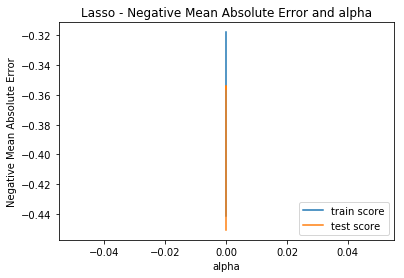

In [94]:
# plotting mean test and train scoes with alpha 
cv_results_lasso['param_alpha'] = cv_results_lasso['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_train_score'])
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Lasso - Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='lower right')
plt.show()

In [95]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =.001
lasso001,lasso001_metric,lasso001_prediction = deriveMetricsForAlphaLasso(alpha,X_test,y_train,y_pred_train,y_test,X_train)


In [96]:
alpha =.002
lasso002,lasso002_metric,lasso002_prediction = deriveMetricsForAlphaLasso(alpha,X_test,y_train,y_pred_train,y_test,X_train)


In [135]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)','MSE (Train)','MSE (Test)'] }

lr_row = pd.DataFrame(lr_table ,columns = ['Metric'] )
rg1_metric = pd.Series(ridge1_metric, name = 'Ridge Regression Alpha 1')
rg2_metric = pd.Series(ridge2_metric, name = 'Ridge Regression Alpha 2')
rg4_metric = pd.Series(ridge4_metric, name = 'Ridge Regression Alpha 4')
ls001_metric = pd.Series(lasso001_metric, name = 'Lasso Regression .001')
ls002_metric = pd.Series(lasso002_metric, name = 'Ridge Regression .002')
final_metric = pd.concat([lr_row,rg1_metric,rg2_metric,rg4_metric,ls001_metric,ls002_metric], axis = 1)
final_metric = pd.concat([lr_row,rg2_metric,rg4_metric,ls001_metric,ls002_metric], axis = 1)

final_metric


,Metric,Ridge Regression Alpha 2,Ridge Regression Alpha 4,Lasso Regression .001,Ridge Regression .002
0,R2 Score (Train),0.793309,0.793309,0.793309,0.793309
1,R2 Score (Test),0.772433,0.774338,0.773692,0.778042
2,RSS (Train),168.660136,168.660136,168.660136,168.660136
3,RSS (Test),82.758178,82.065465,82.300399,80.718199
4,MSE (Train),0.454633,0.454633,0.454633,0.454633
5,MSE (Test),0.485570,0.483534,0.484225,0.479548


- Linear Model has huge deviation from test and train metrics 
- Linear Model R2 Score is negative only when the chosen model does not follow the trend of the data. It seems that your model may be giving better performance because of over-fitting.

We can coclude from the plots and per the data above, alpha for Ridge can be choosen as 10 and alpha for Lasso be 100

In [98]:
table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)']}
metric = pd.DataFrame(table ,columns = ['Metric'] )
Q1_Ridge_metric = pd.concat([metric,rg2_metric, rg4_metric], axis = 1)

Q1_Ridge_metric

,Metric,Ridge Regression Alpha 2,Ridge Regression Alpha 4
0,R2 Score (Train),0.793309,0.793309
1,R2 Score (Test),0.772433,0.774338
2,RSS (Train),168.660136,168.660136
3,RSS (Test),82.758178,82.065465
4,MSE (Train),0.454633,0.454633
5,MSE (Test),0.485570,0.483534


In [99]:
Q1_Lasso_metric = pd.concat([metric,ls001_metric,ls002_metric], axis = 1)

Q1_Lasso_metric

,Metric,Lasso Regression .001,Ridge Regression .002
0,R2 Score (Train),0.793309,0.793309
1,R2 Score (Test),0.773692,0.778042
2,RSS (Train),168.660136,168.660136
3,RSS (Test),82.300399,80.718199
4,MSE (Train),0.454633,0.454633
5,MSE (Test),0.484225,0.479548


### Lets compare the coefficients with Linear Regression, Ridge and Lasso

In [100]:
coeff = pd.DataFrame(index=X_train.columns)

In [101]:
coeff.rows = X_train.columns
coeff.rows

Index(['OverallQual', 'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', 'LowQualFinSF',
       'GrLivArea', 'GarageYrBlt', 'GarageCars', 'Age', 'ModelledAge',
       'LandSlope', 'MSZoning_RH', 'MSZoning_RM', 'LandContour_Low',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_MeadowV', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Condition1_Norm', 'BldgType_Duplex', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'HouseStyle_1.5Unf', 'HouseStyle_SLvl',
       'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'Exterior1st_BrkFace',
       'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_Stucco',
       'Exterior2nd_BrkFace', 'Exterior2nd_Stucco', 'Exterior2nd_Wd Shng',
       'MasVnrType_BrkFace', 'MasVnrType_Stone', 'Foundation_Slab',
       'Heating_Grav', 'Heating_OthW', 'Electrica

In [102]:
coeff['Ridge 2'] = ridge2.coef_
coeff['Ridge 4'] = ridge4.coef_
coeff['Lasso .001'] = lasso001.coef_
coeff['Lasso .002'] = lasso002.coef_
pd.set_option('display.max_rows', None)
coeff.head(68)

,Ridge 2,Ridge 4,Lasso .001,Lasso .002
OverallQual,0.264838,0.269600,0.263568,0.266866
BsmtFinSF1,0.010570,0.020060,0.013624,0.029799
BsmtUnfSF,-0.044081,-0.033593,-0.042044,-0.021005
1stFlrSF,0.040462,0.038459,0.038479,0.029864
LowQualFinSF,-0.033375,-0.033795,-0.032082,-0.031469
GrLivArea,0.264071,0.264647,0.265483,0.267652
GarageYrBlt,-0.042535,-0.042315,-0.039812,-0.035516
GarageCars,0.135124,0.137011,0.134594,0.136662
Age,-0.211641,-0.203056,-0.216252,-0.209654
ModelledAge,-0.155386,-0.156008,-0.155682,-0.158765


We can compare above all the attributes, their coefficients for the different models we built
- coeff are very different in the models
- TotalBsmtSF shows a highly negative for linear, but positive for Ridge and Lasso 
- BsmtUnfSF	shows a highly positive for linear, positive for Ridge but 0 for Lasso
- BsmtHalfBath is positive for Ridge but negative for Linear and Lasso

Error distribution in train dataset


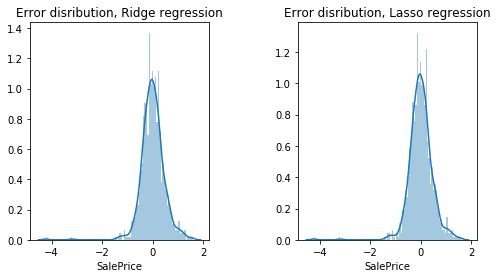

In [103]:
y_pred_ridge_train = ridge2.predict(X_train)
y_pred_lasso_train = lasso001.predict(X_train)
print('Error distribution in train dataset')
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.distplot((y_train - y_pred_ridge_train), bins = 100)
plt.title('Error disribution, Ridge regression')

plt.subplot(1, 2, 2)
sns.distplot((y_train - y_pred_lasso_train), bins = 100)
plt.title('Error disribution, Lasso regression')

plt.subplots_adjust(wspace = .5)

Error distribution in test dataset


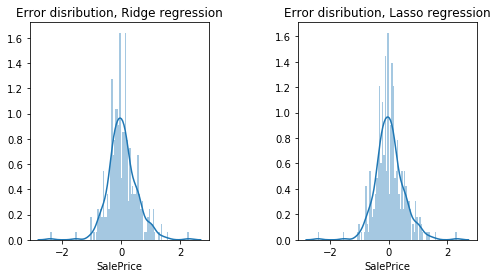

In [104]:
y_pred_ridge_test = ridge2.predict(X_test)
y_pred_lasso_test = lasso001.predict(X_test)
print('Error distribution in test dataset')
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.distplot((y_test - y_pred_ridge_test), bins = 100)
plt.title('Error disribution, Ridge regression')

plt.subplot(1, 2, 2)
sns.distplot((y_test - y_pred_lasso_test), bins = 100)
plt.title('Error disribution, Lasso regression')

plt.subplots_adjust(wspace = .5)

In [105]:
# Lets find the top 5 attributes having positive impact on SalePrice using Ridge
ridge2_top_pos=coeff['Ridge 2'].sort_values(ascending=False)[0:5]
ridge2_top_pos

Neighborhood_StoneBr    0.668081
Neighborhood_NridgHt    0.548927
Neighborhood_Crawfor    0.533017
Neighborhood_ClearCr    0.444779
Neighborhood_NoRidge    0.440623
Name: Ridge 2, dtype: float64

In [106]:
# Lets find the top 5 attributes having positive impact on SalePrice using Ridge
ridge4_top_pos = coeff['Ridge 4'].sort_values(ascending=False)[0:5]
ridge4_top_pos

Neighborhood_StoneBr    0.525547
Neighborhood_Crawfor    0.488720
Neighborhood_NridgHt    0.448855
Neighborhood_ClearCr    0.401946
Exterior1st_BrkFace     0.387103
Name: Ridge 4, dtype: float64

In [107]:
# Lets find the top 5 attributes having negative impact on SalePrice using Ridge
ridge2_top_neg=coeff['Ridge 2'].sort_values()[0:5]
ridge2_top_neg


BldgType_Twnhs       -0.666930
Foundation_Slab      -0.489336
BldgType_TwnhsE      -0.458627
Heating_OthW         -0.379681
GarageType_CarPort   -0.343807
Name: Ridge 2, dtype: float64

In [108]:
# Lets find the top 5 attributes having negative impact on SalePrice using Ridge
ridge4_top_neg=coeff['Ridge 4'].sort_values()[0:5]
ridge4_top_neg

BldgType_Twnhs    -0.565103
BldgType_TwnhsE   -0.405802
Foundation_Slab   -0.392482
BldgType_Duplex   -0.269806
Heating_OthW      -0.254907
Name: Ridge 4, dtype: float64

From above Negative impact as per <b>Ridge Regression </b> with alpha 2 and 4 are :
- BldgType_Twnhs       
- BldgType_TwnhsE      
- Exterior1st_Stucco   
- Heating_OthW          (identified wih alpha 2 not with alpha 4)
- FireplaceQu_NA       (identified wih alpha 2 not with alpha 4)
- Exterior2nd_Wd Shng    (identified wih alpha 4 not with alpha 2 )
- BldgType_Duplex  (identified wih alpha 4 not with alpha 2 )







In [109]:
predict_var_ridge = pd.concat([ridge2_top_neg, ridge4_top_neg,ridge2_top_pos,ridge4_top_pos], axis = 1)
predict_var_ridge

,Ridge 2,Ridge 4,Ridge 2,Ridge 4
BldgType_Duplex,NaN,-0.269806,NaN,NaN
BldgType_Twnhs,-0.666930,-0.565103,NaN,NaN
BldgType_TwnhsE,-0.458627,-0.405802,NaN,NaN
Exterior1st_BrkFace,NaN,NaN,NaN,0.387103
Foundation_Slab,-0.489336,-0.392482,NaN,NaN
GarageType_CarPort,-0.343807,NaN,NaN,NaN
Heating_OthW,-0.379681,-0.254907,NaN,NaN
Neighborhood_ClearCr,NaN,NaN,0.444779,0.401946
Neighborhood_Crawfor,NaN,NaN,0.533017,0.488720
Neighborhood_NoRidge,NaN,NaN,0.440623,NaN


In [110]:
# Lets find the top 5 attributes having positive impact on SalePrice using Lasso
lasso001_top_pos=coeff['Lasso .001'].sort_values(ascending=False)[0:5]
lasso001_top_pos

Neighborhood_StoneBr    0.747630
Neighborhood_NridgHt    0.598770
Neighborhood_Crawfor    0.551702
Neighborhood_NoRidge    0.472896
Neighborhood_ClearCr    0.465588
Name: Lasso .001, dtype: float64

In [111]:
# Lets find the top 5 attributes having negative impact on SalePrice using Ridge
lasso001_top_neg=coeff['Lasso .001'].sort_values()[0:5]
lasso001_top_neg

BldgType_Twnhs       -0.696857
Foundation_Slab      -0.500089
BldgType_TwnhsE      -0.476754
Heating_OthW         -0.345597
GarageType_CarPort   -0.303441
Name: Lasso .001, dtype: float64

In [112]:
# Lets find the top 5 attributes having positive impact on SalePrice using Lasso
lasso002_top_pos=coeff['Lasso .002'].sort_values(ascending=False)[0:5]
lasso002_top_pos

Neighborhood_StoneBr    0.601116
Neighborhood_Crawfor    0.508936
Neighborhood_NridgHt    0.486215
Neighborhood_ClearCr    0.427353
Exterior1st_BrkFace     0.379470
Name: Lasso .002, dtype: float64

In [113]:
# Lets find the top 5 attributes having negative impact on SalePrice using Ridge
lasso002_top_neg=coeff['Lasso .002'].sort_values()[0:5]
lasso002_top_neg

BldgType_Twnhs         -0.607450
BldgType_TwnhsE        -0.417642
Foundation_Slab        -0.378185
BldgType_Duplex        -0.264390
Neighborhood_Edwards   -0.217687
Name: Lasso .002, dtype: float64

In [114]:
predict_var_lasso = pd.concat([lasso001_top_neg, lasso002_top_neg,lasso001_top_pos,lasso002_top_pos], axis = 1)
predict_var_lasso

,Lasso .001,Lasso .002,Lasso .001,Lasso .002
BldgType_Duplex,NaN,-0.264390,NaN,NaN
BldgType_Twnhs,-0.696857,-0.607450,NaN,NaN
BldgType_TwnhsE,-0.476754,-0.417642,NaN,NaN
Exterior1st_BrkFace,NaN,NaN,NaN,0.379470
Foundation_Slab,-0.500089,-0.378185,NaN,NaN
GarageType_CarPort,-0.303441,NaN,NaN,NaN
Heating_OthW,-0.345597,NaN,NaN,NaN
Neighborhood_ClearCr,NaN,NaN,0.465588,0.427353
Neighborhood_Crawfor,NaN,NaN,0.551702,0.508936
Neighborhood_Edwards,NaN,-0.217687,NaN,NaN


In [115]:
# Creating a table which contain top influencers, trying to capture the top 5 positive and top 5 neative influencers 
#Similar can be used to fetch the top 10 predictors easily 

pos_Ridge_2 = coeff['Ridge 2'].sort_values(ascending=False)[0:5]
pos_Ridge_4 = coeff['Ridge 4'].sort_values(ascending=False)[0:5]

pos_Lasso_001 = coeff['Lasso .001'].sort_values(ascending=False)[0:5]
pos_Lasso_002 = coeff['Lasso .002'].sort_values(ascending=False)[0:5]

neg_Ridge_2 = coeff['Ridge 2'].sort_values()[0:5]
neg_Ridge_4 = coeff['Ridge 4'].sort_values()[0:5]

neg_Lasso_001 = coeff['Lasso .001'].sort_values()[0:5]
neg_Lasso_002 = coeff['Lasso .002'].sort_values()[0:5]

pos_Ridge_coef_2 =  pd.Series(pos_Ridge_2, name = 'Ridge Regression Positive(Alpha 2)')
pos_Ridge_coef_4 =  pd.Series(pos_Ridge_4, name = 'Ridge Regression Positive(Alpha 4)')

pos_Lasso_coef_001 =  pd.Series(pos_Lasso_001, name = 'Lasso Regression Positive(Alpha .001)')
pos_Lasso_coef_002 =  pd.Series(pos_Lasso_002, name = 'Lasso Regression Positive(Alpha .002)')

neg_Ridge_coef_2 = pd.Series(neg_Ridge_2, name = 'Ridge Regression Negative(Alpha 2)')
neg_Ridge_coef_4 = pd.Series(neg_Ridge_4, name = 'Ridge Regression Negative(Alpha 3)')

neg_Lasso_coef_001 = pd.Series(neg_Lasso_001, name = 'Lasso Regression Negative(Alpha .001)')
neg_Lasso_coef_002 = pd.Series(neg_Lasso_002, name = 'Lasso Regression Negative(Alpha .002)')




In [116]:
# Creating a table which contain top positive influencers
pos_final_coeff = pd.concat([pos_Ridge_coef_2,pos_Ridge_coef_4,pos_Lasso_coef_001,pos_Lasso_coef_002], axis = 1)
pos_final_coeff

,Ridge Regression Positive(Alpha 2),Ridge Regression Positive(Alpha 4),Lasso Regression Positive(Alpha .001),Lasso Regression Positive(Alpha .002)
Exterior1st_BrkFace,NaN,0.387103,NaN,0.379470
Neighborhood_ClearCr,0.444779,0.401946,0.465588,0.427353
Neighborhood_Crawfor,0.533017,0.488720,0.551702,0.508936
Neighborhood_NoRidge,0.440623,NaN,0.472896,NaN
Neighborhood_NridgHt,0.548927,0.448855,0.598770,0.486215
Neighborhood_StoneBr,0.668081,0.525547,0.747630,0.601116


Top positive predictors are pretty much similar with both Ridge and Lasso with different value for alpha 
- Exterior1st_BrkFace is idenified in Ridge with alpha 4 and Lasso with alpha 2 
- Neighborhood_NoRidge is idenified in Ridge with alpha 2 and Lasso with alpha .001
- Since coefficient of Neighborhood_NoRidge is higher we can opt Ridge with alpha 2 and Lasso with alpha .001 to be more effective 

In [117]:
# Creating a table which contain top negative influencers
neg_final_coeff = pd.concat([neg_Ridge_coef_2,neg_Ridge_coef_4,neg_Lasso_coef_001,neg_Lasso_coef_002], axis = 1)
neg_final_coeff

,Ridge Regression Negative(Alpha 2),Ridge Regression Negative(Alpha 3),Lasso Regression Negative(Alpha .001),Lasso Regression Negative(Alpha .002)
BldgType_Duplex,NaN,-0.269806,NaN,-0.264390
BldgType_Twnhs,-0.666930,-0.565103,-0.696857,-0.607450
BldgType_TwnhsE,-0.458627,-0.405802,-0.476754,-0.417642
Foundation_Slab,-0.489336,-0.392482,-0.500089,-0.378185
GarageType_CarPort,-0.343807,NaN,-0.303441,NaN
Heating_OthW,-0.379681,-0.254907,-0.345597,NaN
Neighborhood_Edwards,NaN,NaN,NaN,-0.217687


Top negative predictors are pretty much similar with both Ridge and Lasso with different value for alpha 
- BldgType_Duplex is idenified in Ridge with alpha 4 and Lasso with alpha .002 
- GarageType_CarPort is idenified in Ridge with alpha 2 and Lasso with alpha .001
- Neighborhood_Edwards is idenified only in Lasso with alpha .002
- Since coefficient of GarageType_CarPort is higher we can opt Ridge with alpha 2 and Lasso with alpha .001 to be more effective 

We can conclude from the plots alpha for Ridge be 2 and alpha for Lasso be .001

Remove the top 5 predictors and build the model again 


Considering the coefficient of the predictors above -ve as well as +ve, we have following top 5 predictors using .001 alpha as lasso model 

- BldgType_Twnhs       -0.696857
- Neighborhood_StoneBr    0.601116
- Neighborhood_Crawfor    0.508936
- Foundation_Slab      -0.500089
- Neighborhood_NridgHt    0.486215



In [119]:
top_predictors= ['BldgType_Twnhs','Neighborhood_StoneBr','Neighborhood_Crawfor','Foundation_Slab','Neighborhood_NridgHt']

In [120]:
X_train = housing_train
X_test= housing_test
print("Before  : train", X_train.shape, " test: " , X_test.shape )
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]
print("After  : train",X_train.shape, " test: " , X_test.shape )

Before  : train (816, 179)  test:  (351, 179)
After  : train (816, 70)  test:  (351, 70)


In [121]:
print("Before  : train", X_train.shape, " test: " , X_test.shape )
X_New_test=X_test.drop(top_predictors, axis=1, inplace=False)
X_New_train=X_train.drop(top_predictors, axis=1, inplace=False)

print("After  : train",X_New_train.shape, " test: " , X_New_test.shape )

Before  : train (816, 70)  test:  (351, 70)
After  : train (816, 65)  test:  (351, 65)


In [122]:
# cross validation
model_cv_lasso_new = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_lasso_new.fit(X_New_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [123]:
alpha =.001
lasso_new,lasso_new_metric,lasso_new_prediction = deriveMetricsForAlphaLasso(alpha,X_New_test,y_train,y_pred_train,y_test,X_New_train)

In [124]:
lasso_new_metric = pd.Series(ridge2_metric, name = 'Lasso Regression dropping the predictors ')

In [125]:
final_metric = pd.concat([final_metric, lasso_new_metric], axis=1)
final_metric

,Metric,Linear Regression,Ridge Regression Alpha 1,Ridge Regression Alpha 2,Ridge Regression Alpha 4,Lasso Regression .001,Ridge Regression .002,Lasso Regression dropping the predictors
0,R2 Score (Train),NaN,0.793309,0.793309,0.793309,0.793309,0.793309,0.793309
1,R2 Score (Test),NaN,0.770229,0.772433,0.774338,0.773692,0.778042,0.772433
2,RSS (Train),NaN,168.660136,168.660136,168.660136,168.660136,168.660136,168.660136
3,RSS (Test),NaN,83.559543,82.758178,82.065465,82.300399,80.718199,82.758178
4,MSE (Train),NaN,0.454633,0.454633,0.454633,0.454633,0.454633,0.454633
5,MSE (Test),NaN,0.487915,0.485570,0.483534,0.484225,0.479548,0.485570


In [126]:
lasso_new.coef_

coeff_new = pd.DataFrame(index=X_New_train.columns)
coeff_new.rows = X_New_train.columns
coeff_new['Lasso'] = lasso_new.coef_
pd.set_option('display.max_rows', None)
print(coeff_new['Lasso'].sort_values(ascending=False)[0:5])
print(coeff_new['Lasso'].sort_values()[0:5])

Neighborhood_NoRidge    0.431448
Functional_Typ          0.431323
Neighborhood_Somerst    0.421055
Neighborhood_ClearCr    0.406482
Exterior1st_BrkFace     0.357601
Name: Lasso, dtype: float64
Heating_OthW           -0.330116
FireplaceQu_NA         -0.271725
Neighborhood_Edwards   -0.264905
Exterior2nd_Wd Shng    -0.252017
BldgType_TwnhsE        -0.247684
Name: Lasso, dtype: float64


In [127]:
selectedmodel_metric= final_metric[['Metric','Lasso Regression .001']] 
selectedmodel_metric

,Metric,Lasso Regression .001
0,R2 Score (Train),0.793309
1,R2 Score (Test),0.773692
2,RSS (Train),168.660136
3,RSS (Test),82.300399
4,MSE (Train),0.454633
5,MSE (Test),0.484225


### Conclusion

1. Optimum value for lambda in ridge regression is 2
2. Optimum value for lambda in lasso regression is .001
3. We have identified the negative predictors inclucing the price, the company can purchase houses below the market value by highlighting its influence 
4. Since we know the negative predictors, company can put efforts in reducing its influence :
- Focussing on positive predictors
5. We can choose the Lasso Model with .001 alpha as seelcted model with 

I have build the model with different number for the Feature Selection using RFE which suggested different values of alpha with minor deviations in the Metrics .
    - 30 
    - 40
    - 50
    - 55
    - 60
    - 65
    - 70
    
And Difficult to take call on the how many Features we should seelct from RFE . Ultimately lasso will provide me a model with selected predictors alongwith coefficients 

I have build model without using the VIF for feature selection. Even if we don't use there is no significant difference in the model metrics